# Clase 4
### Consignas

1. Conseguir dataset para regresión (pueden generar uno sintético).
1. Armar un código que permita generar múltiples estimadores con diferentes muestras aleatorias (entrenar múltiples modelos tomando muestras aleatorias de los datos y guardar en lista los parámetros de cada uno).
1. Graficar todas las funciones (usar los parámetros guardados en el punto 2 para poder hacer los gráficos y comparar los diferentes resultados). 

Se usará regresión lineal para resolver el cuestionario.

## Carga de las librerías

In [1]:
from sklearn import *
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Para operaciones random
rng = np.random.default_rng(seed=18)

## Generación de los datos
Se crea un dataset sintético con la función no lineal
$$ f(x) = x - cos(x/2) + 3 + Ruido$$

El ruido se le agrega con un random generado sobre una distribución normal

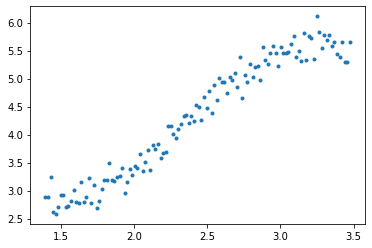

In [2]:
#Generación de los 'x' de la función
x = np.arange(80, 200, 1) # vector en grados
x = x*np.pi/180 # conversión a radianes

# Desvío estandar
stdv = 0.20
#Puntos del dataset
y = x/2 + np.cos(2*x) + 3 + np.random.normal(0, stdv, len(x))
np.random.seed(10)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
plt.plot(x,y,'.')
plt.show()

## Regresión lineal: resultados y gráfico
Se emplean los métodos de Sklearn para los cálculos. Se repitió el proceso varias veces. Existen casos en que la regresión no se ajusta a los datos.

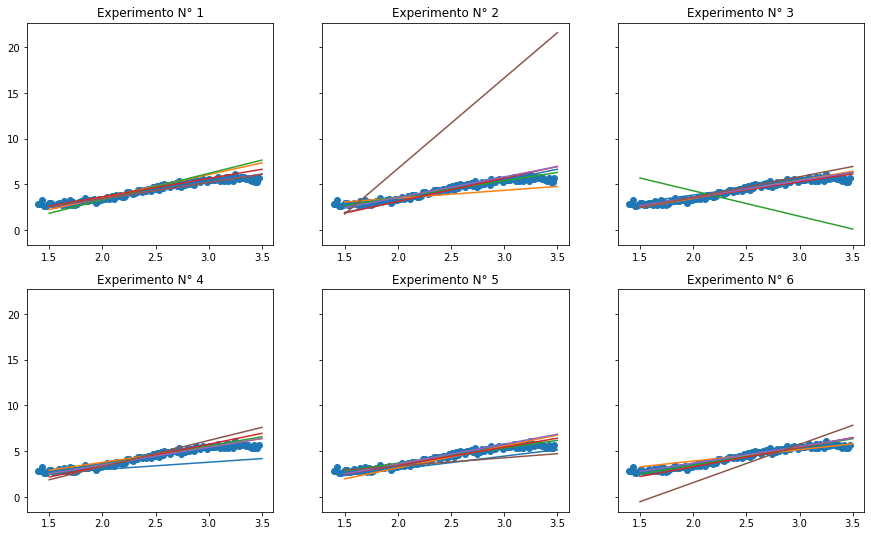

In [17]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
experimentos = 6
cnt = 1
for i in range(2):
    for j in range(3):
        lr = linear_model.LinearRegression()
        x_eje = np.linspace(1.5,3.5,x.shape[0])
        x_eje = x_eje.reshape(-1,1)
        regresiones = []
        for k in range(experimentos):
            idx = np.random.randint(0,100,2)
            x_sample, y_sample = x[idx], y[idx]
            lr.fit(x_sample, y_sample)
            regresiones.append([yhat for yhat in lr.predict(x_eje)])
        reg = np.asarray(regresiones)
        for r in range(experimentos):
            axs[i, j].plot(x_eje,reg[r])
             
        axs[i, j].title.set_text('Experimento N° {}'.format(cnt))
        axs[i, j].scatter(x,y)
        cnt += 1